<a href="https://colab.research.google.com/github/bryanMontoya/machineLearning/blob/main/XGBoost1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from  xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_confusion_matrix

In [ ]:
col_names = ['pregnant', 'glucose', 'bp','skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
path = 'drive/MyDrive/ML-Models/data1/'
pima = pd.read_csv(path + 'diabetes.csv')
pima = pima.set_axis(col_names, axis = 1)
pima.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
X = pima.drop('label', axis = 1)
y = pima.label
X.shape

(768, 8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
xgb_model = XGBClassifier(n_estimators = 88, max_depth = 3, objective = 'binary:logistic', nthread = 4, scale_pos_weight = 1, seed = 27)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [ ]:
print('Accuracy en entrenamiento: {:.2f}'.format(xgb_model.score(X_train, y_train)))
print('Accuracy en test: {:.2f}'.format(xgb_model.score(X_test, y_test)))

Accuracy en entrenamiento: 0.89
Accuracy en test: 0.74


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[101  25]
 [ 25  41]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       126
           1       0.62      0.62      0.62        66

    accuracy                           0.74       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



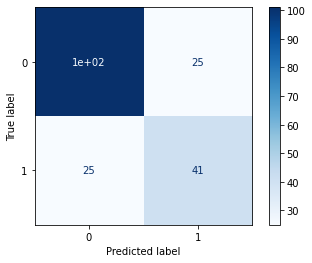

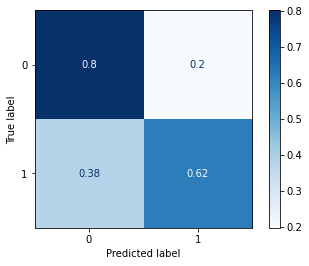

In [ ]:
plot_confusion_matrix(xgb_model, X_test, y_test, cmap = plt.cm.Blues);
plot_confusion_matrix(xgb_model, X_test, y_test, cmap = plt.cm.Blues, normalize = 'true');

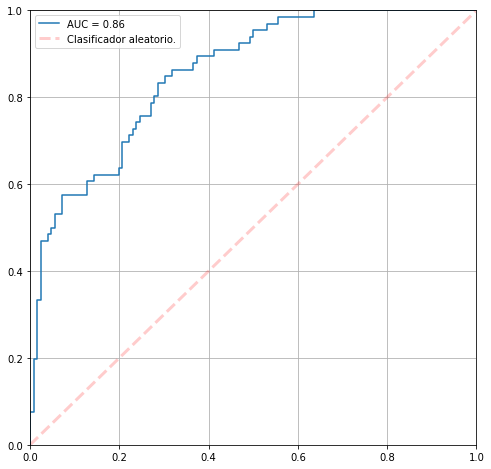

In [ ]:
plt.figure(figsize = (8,8))
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, label = "AUC = {:.2f}".format(auc))
plt.plot([0,1],[0,1], ls = '--', lw = 3, color = 'r', alpha = 0.2, label = 'Clasificador aleatorio.')
plt.grid()
plt.xlim([0,1])
plt.ylim([0,1.001])
plt.legend()

Text(0, 0.5, 'Pedigree function')

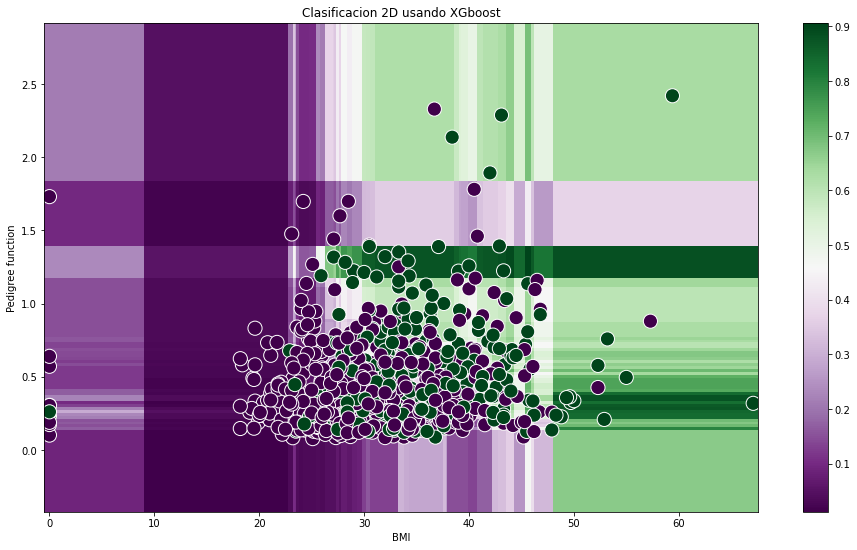

In [ ]:
X = pima.drop('label', axis = 1).values
y = pima.label
h = 0.02
clf = XGBClassifier(n_estimators = 88, max_depth = 3, objective = 'binary:logistic', nthread = 4, scale_pos_weight= 1, seed = 27)
clf.fit(X[:,[5,6]],y)
x_min, x_max = X[:,5].min() - 0.5, X[:,5].max() + 0.5
y_min, y_max = X[:,6].min() - 0.5, X[:,6].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

plt.figure(figsize = (16,9))
plt.pcolormesh(xx, yy, Z, cmap = 'PRGn')
plt.colorbar();

plt.scatter(X[:,5], X[:,6], c = y, cmap = 'PRGn', edgecolor = 'w', s = 200);
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])

plt.title('Clasificacion 2D usando XGboost')
plt.xlabel('BMI')
plt.ylabel('Pedigree function')

Identificar características importantes.

In [ ]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)
print(importances[indices])
features = X_train.columns
print(features[indices])

[0.07484563 0.08147863 0.08851442 0.09501216 0.10135633 0.14186372
 0.15676856 0.26016054]
Index(['bp', 'pedigree', 'insulin', 'pregnant', 'skin', 'bmi', 'age',
       'glucose'],
      dtype='object')


Text(0.5, 0, 'Importancia relativa')

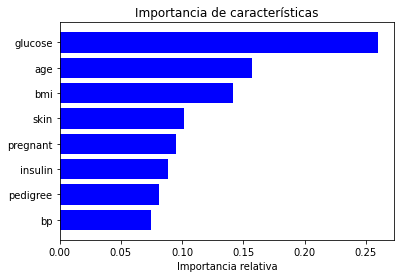

In [ ]:
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.title('Importancia de características')
plt.yticks(range(len(indices)),[features[i]for i in indices]);
plt.xlabel('Importancia relativa')